==========================================Домашняя контрольная работа №1==========================================
====================================================Вариант №7====================================================
1. Создать отдельный скрипт для расчета среднего значения по передаваемой группе чисел (не более 10). 
Запустить этот скрипт с передачей параметров окружения (аргументов командной строки), проверив различные 
ситуации обработки  [0,5 балла].
2. Используя функционал numpy, сгенерируйте N = 1000 отсчетов случайного процесса первого порядка 
(дисперсия процесса 8, СКО случайной добавки 4, корреляция положительная). На базе Pandas создайте датафрейм, 
который содержит отсчеты Xi и запаздывающие на 2 момента времени отсчеты (Xi-2), рассчитайте корреляцию между столбцами. 
С помощью matplotlib постройте график самого случайного процесса с помощью синей пунктирной линии, добавив все подписи 
(заголовок, оси и легенда). [0,5 балла].
3. Загрузите данные из файла «farmers_salary_transactions.csv», выполнив необходимую предобработку данных по правильной 
интерпретации в Python. Выведите описательную статистику для всех числовых столбцов.  Удалите столбцы, 
в которых больше 70% пропущенных значений. Создайте в качестве целевого столбца столбец [TARGET], рассчитанный 
как среднее значение за последние 3 недели [Week50-Week52] плюс случайная нормальная добавка с дисперсией 10. [0,25 балла]. 
4. Создайте столбец [CLASS], значение в котором рассчитываются на основе среднего значения в столбце 
TARGET (mean_T) – {0, если значение меньше 0,7*mean_T}, {2, если значение больше 1,3*mean_T}, {1, в остальных случаях}. 
Постройте секторную диаграмму для целевой переменной [CLASS]. Добавьте необходимые подписи. [0,25 балла].
5. Постройте гистограмму для  столбца [Week35] и диаграмму рассеяния для столбцов [Week28] и [Week29] для строк со 
значением [CLASS]=1. [0,25 балла].
6. Постройте модель машинного обучения на основе метода опорных векторов (SVM) для решения задачи классификации целевого 
признака [CLASS] по столбцам [Week50], [Week1] и [Week25], разбив выборку в пропорции 75% на 25%. Сравните метрику accuracy 
на обучающей и тестовой выборке. [0,5 балла]
7. Постройте модель аналогичную п. 6 с использованием дерева решений с глубиной 10. Сравните метрики precision на 
тестовой выборке у обеих моделей. [0,5 балла].
8. Сделайте выводы о проведенной работе [0,25 балла].


In [1]:
#1
'''Создать отдельный скрипт для расчета среднего значения по передаваемой группе чисел (не более 10). Запустить этот скрипт 
с передачей параметров окружения (аргументов командной строки), проверив различные ситуации обработки [0,5 балла].'''

%run mean.py 12 34 6567 4534 233 234 
%run mean.py 12 34 dfsd 

1935.6666666666667
Злюся! Надо вводить числа!!! Вот тебе образец: mean.py 1 2 3 4 5


            Xi       Xi-2
0     0.124346   0.000000
1    -3.495795   0.000000
2    -2.701924   0.124346
3    -3.776284  -3.495795
4    -4.913508  -2.701924
..         ...        ...
995  14.152358  10.903123
996   8.742258  10.421964
997   5.754811  14.152358
998   9.174538   8.742258
999   9.902647   5.754811

[1000 rows x 2 columns]
Correlation = [[1.         0.98088094]
 [0.98088094 1.        ]]


Text(0, 0.5, 'Случайная величина Xi')

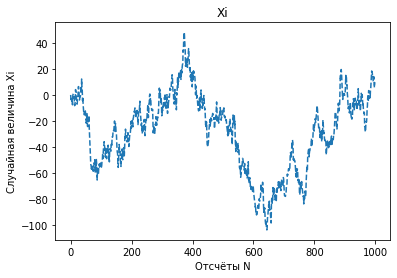

In [1]:
#2
'''Используя функционал numpy, сгенерируйте N = 1000 отсчетов случайного процесса первого порядка 
(дисперсия процесса 8, СКО случайной добавки 4, корреляция положительная). На базе Pandas создайте датафрейм, 
который содержит отсчеты Xi и запаздывающие на 2 момента времени отсчеты (Xi-2), рассчитайте корреляцию между столбцами. 
С помощью matplotlib постройте график самого случайного 
процесса с помощью синей пунктирной линии, добавив все подписи (заголовок, оси и легенда). [0,5 балла].'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 1000
Dx = 8
r=1
sigma_x = np.sqrt(Dx)
sigma_e = 4
e = np.random.normal(loc=0, scale = sigma_e, size=N)
Xi=np.zeros(N)
Xi[0] = np.random.normal(loc=0, scale = sigma_x)

for i in range(1,N):
    Xi[i] = r*Xi[i-1]+e[i]

#=======================
Xi_2 = np.zeros(N)
for i in range(2,N):
    Xi_2[i] = Xi[i-2]

df = pd.DataFrame({'Xi': Xi, 'Xi-2': Xi_2})
print(df)
correl = np.corrcoef(Xi,Xi_2)
print(f'Correlation = {correl}')

n = np.arange(N)
plt.plot(n,Xi,linestyle = '--')
plt.title('Xi')
plt.xlabel('Отсчёты N')
plt.ylabel('Случайная величина Xi')

In [22]:
#3
'''Загрузите данные из файла «farmers_salary_transactions.csv», выполнив необходимую предобработку данных 
по правильной интерпретации в Python. Выведите описательную статистику для всех числовых столбцов. 
Удалите столбцы, в которых больше 70% пропущенных значений. Создайте в качестве целевого столбца столбец [TARGET], 
рассчитанный как среднее значение за последние 3 недели [Week50-Week52] 
плюс случайная нормальная добавка с дисперсией 10. [0,25 балла].'''
data = pd.read_csv('farmers_salary_transactions.csv',delimiter=",",decimal=',')

for i in data.columns[1:]:
    data.loc[(data[i] == ' -   '), i] = None 
print(data.isnull().sum(axis = 0)/len(data)) # НИЧЕГО УДАЛЯТЬ НЕ НУЖНО


data = pd.read_csv('farmers_salary_transactions.csv',delimiter=",",decimal=',')
for i in data.columns[1:]:
    data.loc[data[i] == ' -   ', i] = '0.0'

def help_me(a):
    w = a.replace(',', '.')
    try:
        j = float(w)
    except: # Следующей операцией мы трансформируем числа наподобие 1.156.06 в число 1156.06
        t = list(w)
        t[1]=''
        t1 = ''.join(t)
        t2 = t1.replace(',','.')
        j = float(t2)
    return j 

data.set_index('Farmer No.',inplace=True)     
for i in data.columns:
     data[i] = [help_me(x) for x in data[i]]
            
for i in data.columns:
    a = data[i].mean()
    data.loc[data[i] == 0, i] = a
    
print(data.describe()) # ВЫВЕЛИ СТАТИСТИКУ

e = np.random.normal(loc=0, scale = np.sqrt(10), size=len(data['Week50']))
data['TARGET'] = e + (data['Week50']+data['Week51']+data['Week52'])/3 # СДЕЛАЛИ НОВЫЙ СТОЛБЕЦ
data

Farmer No.    0.000000
Week1         0.216471
Week2         0.218824
Week3         0.216471
Week4         0.210980
Week5         0.240000
Week6         0.223529
Week7         0.221961
Week8         0.221961
Week9         0.298039
Week10        0.229020
Week11        0.243922
Week12        0.242353
Week13        0.216471
Week14        0.186667
Week15        0.151373
Week16        0.155294
Week17        0.130980
Week18        0.134118
Week19        0.130196
Week20        0.126275
Week21        0.094902
Week22        0.096471
Week23        0.088627
Week24        0.084706
Week25        0.087059
Week26        0.079216
Week27        0.076863
Week28        0.079216
Week29        0.083922
Week30        0.085490
Week31        0.088627
Week32        0.105882
Week33        0.117647
Week34        0.160784
Week35        0.165490
Week36        0.169412
Week37        0.175686
Week38        0.190588
Week39        0.211765
Week40        0.211765
Week41        0.243137
Week42        0.219608
Week43     

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,...,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52,TARGET
Farmer No.,,,,,,,,,,,,,,,,,,,,,
1,55.227308,69.086377,68.296087,60.502899,64.066903,55.004633,61.710169,67.262675,76.864082,58.985073,...,44.137706,44.510722,48.126327,55.976064,57.235502,2.918000,1.882000,1.939000,1.115000,4.044836
2,6.487000,10.898000,5.133000,3.138000,3.056000,5.293000,3.170000,2.751000,76.864082,3.333000,...,44.137706,1.931000,122.000000,55.976064,2.704000,7.147000,5.125000,2.589000,917.000000,308.291531
3,1.289000,1.392000,1.789000,1.319000,662.000000,2.290000,1.994000,2.527000,1.172000,3.059000,...,2.306000,1.206000,1.417000,1.310000,2.153000,1.771000,3.527000,3.665000,3.110000,9.696455
4,3.844000,4.256000,3.716000,4.511000,5.209000,7.299000,9.899000,7.440000,1.915000,18.215000,...,26.493000,1.217000,2.791000,55.976064,5.203000,7.938000,1.909000,850.000000,546.000000,464.662985
5,3.428000,2.346000,2.419000,2.110000,1.569000,2.110000,1.951000,936.000000,169.000000,235.000000,...,1.216000,657.000000,225.000000,357.000000,57.235502,63.704298,181.000000,189.000000,76.000000,147.735106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,55.227308,706.000000,3.507000,908.000000,1.008000,794.000000,336.000000,170.000000,76.864082,58.985073,...,5.160000,5.899000,12.465000,13.900000,14.840000,10.741000,12.040000,9.241000,10.365000,9.606441
1272,174.233000,90.237000,65.438000,23.628000,2.536000,3.241000,2.550000,1.662000,977.000000,1.112000,...,2.736000,2.681000,4.051000,2.703000,3.651000,4.974000,2.088000,2.112000,3.358000,3.610177
1273,9.490000,18.144000,1.728000,1.573000,64.066903,55.004633,1.564000,655.000000,76.864082,58.985073,...,44.137706,44.510722,48.126327,55.976064,57.235502,63.704298,56.608824,67.983684,73.947523,61.503343


In [23]:
#4
'''Создайте столбец [CLASS], значение в котором рассчитываются на основе среднего значения 
в столбце TARGET (mean_T) – {0, если значение меньше 0,7mean_T}, {2, если значение больше 1,3mean_T}, {1, в остальных случаях}. 
Постройте секторную диаграмму для целевой переменной [CLASS]. Добавьте необходимые подписи. [0,25 балла].'''
                                                                                    
m = data.TARGET.mean() 
def zamena(a):
    if a<0.7*m:
        b = 0
    elif a>1.3*m:
        b= 2
    else:
        b= 1
    return b

data['TEST1'] = data.TARGET 
data['CLASS'] = [zamena(x) for x in data.TEST1]
data = data.drop(columns='TEST1')
print(data)

import plotly.express as px
fig = px.pie(data, values='TARGET', names='CLASS')
fig.update_layout(title='Распределение по классам')
fig.show()


                 Week1       Week2       Week3       Week4       Week5  \
Farmer No.                                                               
1            55.227308   69.086377   68.296087   60.502899   64.066903   
2             6.487000   10.898000    5.133000    3.138000    3.056000   
3             1.289000    1.392000    1.789000    1.319000  662.000000   
4             3.844000    4.256000    3.716000    4.511000    5.209000   
5             3.428000    2.346000    2.419000    2.110000    1.569000   
...                ...         ...         ...         ...         ...   
1271         55.227308  706.000000    3.507000  908.000000    1.008000   
1272        174.233000   90.237000   65.438000   23.628000    2.536000   
1273          9.490000   18.144000    1.728000    1.573000   64.066903   
1274         40.052000   16.401000    6.779000   24.153000   26.360000   
1275        250.000000   25.455000  196.474000  169.923000  113.562000   

                 Week6       Week7   

#5
Постройте гистограмму для столбца [Week35] и диаграмму рассеяния для столбцов [Week28] и [Week29] для строк со значением [CLASS]=1. [0,25 балла].

In [27]:
# ГИСТОГРАММА
fig = px.histogram(data, x=data['Week35'])
fig.show()

In [33]:
# ДИАГРАММА РАССЕИВАНИЯ
fig = px.scatter(data[data.CLASS == 1], x=data['Week28'], y=data['Week29'], 
                 title='Диаграмма рассеивания для Week28 и Week29')
fig.show()


#6 Постройте модель машинного обучения на основе метода опорных векторов (SVM) для решения задачи классификации целевого признака [CLASS] по столбцам [Week50], [Week1] и [Week25], разбив выборку в пропорции 75% на 25%. Сравните метрику accuracy на обучающей и тестовой выборке. [0,5 балла]

In [39]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(data[['Week50', 'Week1', 'Week25']], data.CLASS,
                                                   test_size=0.75)
svc = svm.SVC()
svc = svc.fit(x_train, y_train)

print('Accuracy_train=',accuracy_score(y_train, svc.predict(x_train)))
print('Accuracy_test=',accuracy_score(y_test, svc.predict(x_test)))
# Метрика accuracy выше на обучающей выборке

Accuracy_train= 0.8081761006289309
Accuracy_test= 0.754440961337513


#7 Постройте модель аналогичную п. 6 с использованием дерева решений с глубиной 10. Сравните метрики precision на тестовой выборке у обеих моделей. [0,5 балла].

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(x_train,y_train)

print('Отчёт по дереву решений', classification_report(y_test, dtc.predict(x_test)))
print('Отчёт по SVC', classification_report(y_test, svc.predict(x_test))) 
# Метрика preciion выше у SVC (0.74,0.57,1.0 против 0.85,0,58,0.62 по классам 0,1,2)

Отчёт по дереву решений               precision    recall  f1-score   support

           0       0.85      0.89      0.87       657
           1       0.58      0.51      0.54       117
           2       0.62      0.56      0.59       183

    accuracy                           0.78       957
   macro avg       0.68      0.65      0.67       957
weighted avg       0.77      0.78      0.77       957

Отчёт по SVC               precision    recall  f1-score   support

           0       0.74      1.00      0.85       657
           1       0.57      0.07      0.12       117
           2       1.00      0.31      0.47       183

    accuracy                           0.75       957
   macro avg       0.77      0.46      0.48       957
weighted avg       0.77      0.75      0.69       957



# 8 
ВЫВОДЫ: По метрике precision SVM работает лучше. Однако по остальным метрикам оценка результатов SVM не представляется однозначной,
ведь по взвешенному среднему SVM проигрывает (например, по метрикам recall, f1-score).

